## Preliminary Thermal Circuits
### ME144 Final Project

In [3]:
from Libraries import thermodynamics as thermo
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as csts
import schemdraw as schem
import schemdraw.elements as e
import math
from Libraries import HT_thermal_resistance as res

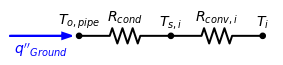

In [18]:
R = []

R.append(res.Resistance(name="$R_{conv,i}$", units="W/m"))
R.append(res.Resistance(name="$R_{cond}$", units="W/m"))
R.append(res.Resistance(name="$R_{conv,o}$", units="W/m"))
R.append(res.Resistance(name="$R_{rad}$", units="W/m"))

#Thermal circuit of fluid when colder than the ground
d = schem.Drawing()
d.add(e.DOT, label = r"$T_{o,pipe}$")
d.add(e.RES, d = 'right', label = R[1].name)
d.add(e.DOT, label = r"$T_{s,i}$")
R1 = d.add(e.RES, d = 'right', label = R[0].name)
d.add(e.DOT, label = r"$T_{i}$")

L1 = d.add(e.LINE, botlabel = "$q''_{Ground}$", endpts = [[-2.25, 0], [-0.25, 0]], color = 'blue')
d.labelI(L1, arrowofst = 0, color = 'blue')


d.draw()

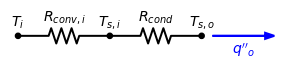

In [28]:
#Thermal circuit of fluid when warmer than ground
d = schem.Drawing()
d.add(e.DOT, label = r"$T_{i}$")
d.add(e.RES, d = 'right', label = R[0].name)
d.add(e.DOT, label = r"$T_{s,i}$")
R1 = d.add(e.RES, d = 'right', label = R[1].name)
d.add(e.DOT, label = r"$T_{s,o}$")

L1 = d.add(e.LINE, botlabel = "$q''_{o}$", endpts = [[7, 0], [7.75, 0]], color = 'blue')
d.labelI(L1, arrowofst = 0, color = 'blue')

d.draw()

### Partially Buried Snow Pile

* $T_{snow} = 0^oC$
* At 6 ft, Ground Temp = Constant
$$
q'' = \frac{k}{L}\cdot \Delta T
$$

$$
q''_{soil} = k_{soil} \cdot \frac{T_{6 ft} - T_{snow/soil}}{6 ft}
$$



### Governing Equation for Snow Melt in Pile

$$
\rho_{snow} \cdot h_{L,snow} \cdot \frac{dh}{dt} = - \Sigma q''_{outside} + q''_{inside}
$$

The bulk of the snow pile is $0^oC$, therefore $\vec{\Delta} T = 0$ inside the snow pile resulting in


$$
\vec{q}_{inside} = -h_{snow} \cdot \vec{\Delta}T = 0
$$
Reducing the equation above yields:
$$
\rho_{snow} \cdot h_{L,snow} \cdot \frac{dh}{dt} = - \Sigma q''_{outside}
$$

$$
\frac{dV}{dt} = \frac{1}{\rho_{snow}\cdot h_{L,snow}} \cdot (\Sigma q_{in})
$$

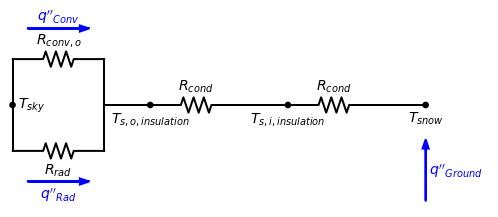

In [69]:
#Thermal circuit of snow pile
d = schem.Drawing()

d.add(e.DOT, rgtlabel = r"$T_{sky}$")
d.push()
d.add(e.LINE, d= 'up', l = 1.5)
d.add(e.RES, d='right', label = R[2].name)
d.add(e.LINE, d='down', l = 1.5)
d.pop()
d.add(e.LINE, d='down', l = 1.5)
d.add(e.RES, d='right', botlabel = R[3].name)
d.add(e.LINE, d= 'up', l = 1.5)
d.add(e.LINE,d='right',l=1.5)
d.add(e.DOT, botlabel="$T_{s,o,insulation}}$")

d.add(e.RES, d = 'right', label = R[1].name)
d.add(e.LINE,d='right',l=1.5)
d.add(e.DOT, botlabel="$T_{s,i,insulation}}$")

d.add(e.RES, d = 'right', label = R[1].name)
d.add(e.LINE,d='right',l=1.5)
d.add(e.DOT, botlabel="$T_{snow}}$")

L1 = d.add(e.LINE, botlabel = "$q''_{Ground}$", endpts = [[13.5, -3], [13.5, -1.25]], color = 'blue')
d.labelI(L1, arrowofst = 0, color = 'blue')
L2 = d.add(e.LINE, toplabel = "$q''_{Conv}$", endpts = [[.5, 2.5], [2.5, 2.5]], color = 'blue')
d.labelI(L2, arrowofst = 0, color = 'blue')
L3 = d.add(e.LINE, botlabel = "$q''_{Rad}$", endpts = [[.5, -2.5], [2.5, -2.5]], color = 'blue')
d.labelI(L3, arrowofst = 0, color = 'blue')

d.draw()

## Building

### Assumptions
* Within the building, heat transfer from air, through pipe wall, and into cold fluid is negligable.
* Within the building, heat transfer from warm fluid, through pipe wall, and into cool room air is negligable.
